# Estimation of MET cross section with Madgraph 3.6.2

## Import MG5 and dependencies

In [1]:
import os
import sys
sys.path.append('../src') # Only if madpy is not installed
MADGRAPH_PATH = f"../mg5amcnlo-2.9.24"
sys.path.append(MADGRAPH_PATH)


## Install models and plugins

### [DMSimp](https://feynrules.irmp.ucl.ac.be/wiki/DMsimp)
- https://feynrules.irmp.ucl.ac.be/wiki/DMsimp 


Simplified DM extension with a scalar mediator and three DM candidates

- PDG number 5000001 to particle xr
- PDG number 51 to particle xc
- PDG number 52 to particle xd
- PDG number 54 to particle y0

- PDG number 9000001 to particle ghA
- PDG number 9000002 to particle ghZ
- PDG number 9000003 to particle ghWp
- PDG number 9000004 to particle ghWm
- g ghg ghg~ u c d s b u~ c~ d~ s~ b~ a gha gha~ ve vm vt e- mu- ve~ vm~ vt~ e+ mu+ t t~ z w+ ghz ghwp ghwm h xr xc y0 w- ghz~ ghwp~ ghwm~ xc~ ta- xd ta+ xd~

## Run maddm

## On the terminal, run the following

```sh
module load python2.7
python2.7 bin/maddm.py maddm_script.txt
```

- Script example in `maddm_script.txt` 

```
import model DMsimp_s_spin0
define darkmatter xd
generate direct
output SCAN_example
launch SCAN_example
set MXd scan:range(50,700,25)
```

In [11]:
!../scripts/run_maddm.sh

Running MG5 in debug mode
Plugin PLUGIN.maddm has marked as NOT being validated with this version. 
It has been validated for the last time with version: 2.9.9
            |                    MadDM v3.2                     |
                                                                               
                #########                                                        
             ###\\####//#####              Launchpad:  launchpad.net/maddm      
           ######\\##//########                                              
          ########\\//###########                     arXiv:1308.4955        
         #########//\\############                    arXiv:1505.04190       
        #########//##\\############                   arXiv:1804.00044        
       ########//#####\\###########                   arXiv:2107.04598        
       ######################### ## ___________________________________________
       ####################### 0  #  _     _               

## Read the `scan_run*.txt` file

In [ ]:
import pandas as pd

# Path to your file
file_path = '../workdir/dmsimp_v1/MADDM_spin0/output/scan_run_01.txt'

# Read file, skipping the '#' in the header lines
df = pd.read_csv(
    file_path,
    sep=r"\s+",            # whitespace separator
    comment='#',          # keep header lines
    skip_blank_lines=True,
    header=None,           # no header by default
)

# Extract column names (lines starting with "#")
with open(file_path, "r") as f:
    lines = f.readlines()

columns = []
for line in lines:
    if line.startswith("#"):
        parts = line.strip().split(":")
        if len(parts) == 2:
            columns.append(parts[1].strip())

# Assign column names
df.columns = columns


df.rename(columns={"mass#52":"m_f", "mass#54":"M_med"}, inplace=True)
df


,run,m_f,M_med,Omegah^2,x_f,sigmav(xf),%_relic_xdxdx_y0y0,%_relic_xdxdx_hh,%_relic_xdxdx_zz,%_relic_xdxdx_ttx,%_relic_xdxdx_aa,%_relic_xdxdx_wpwm,%_relic_xdxdx_az,xsi
0,run_01_01,167.0,500.0,0.3330,21.0,1.190000e-26,0.0,0.0687,19.700,0.0,34.500,45.80,0.0,1.000
1,run_01_02,333.0,1000.0,0.0464,23.0,2.960000e-26,0.0,0.0085,0.709,97.0,0.794,1.46,0.0,0.387
2,run_01_03,500.0,1500.0,0.0838,22.0,1.610000e-26,0.0,0.0194,1.400,94.3,1.460,2.84,0.0,0.699
3,run_01_04,667.0,2000.0,0.1330,22.0,9.950000e-27,0.0,0.0337,2.320,90.6,2.360,4.68,0.0,1.000
4,run_01_05,833.0,2500.0,0.1890,22.0,6.870000e-27,0.0,0.0506,3.410,86.3,3.430,6.85,0.0,1.000
5,run_01_06,1000.0,3000.0,0.2490,22.0,5.140000e-27,0.0,0.0691,4.600,81.5,4.600,9.24,0.0,1.000
6,run_01_07,1170.0,3500.0,0.3120,22.0,4.070000e-27,0.0,0.0885,5.860,76.5,5.830,11.70,0.0,1.000
7,run_01_08,1330.0,4000.0,0.3730,22.0,3.370000e-27,0.0,0.1080,7.120,71.4,7.070,14.30,0.0,1.000


In [ ]:
df['cross'] = df['cross'] * 1E3 # Convert pb -> fb

In [16]:
import matplotlib.pyplot as plt

def plot_columns(df, x_col, y_col, xlabel=None, ylabel=None, title=None, log=True):
    """
    Plot a scatter plot of two columns from a pandas DataFrame.

    Parameters
    ----------
    df : pandas.DataFrame
        The dataframe containing the data.
    x_col : str
        Name of the column to use for the x-axis.
    y_col : str
        Name of the column to use for the y-axis.
    xlabel : str, optional
        Custom label for the x-axis. Defaults to column name.
    ylabel : str, optional
        Custom label for the y-axis. Defaults to column name.
    title : str, optional
        Title of the plot.
    """
    plt.figure(figsize=(7, 5))
    plt.scatter(df[x_col], df[y_col], s=50, alpha=0.7, edgecolor="k")

    plt.xlabel(xlabel if xlabel else x_col)
    plt.ylabel(ylabel if ylabel else y_col)
    if log:
        plt.yscale('log')
    if title:
        plt.title(title)

    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

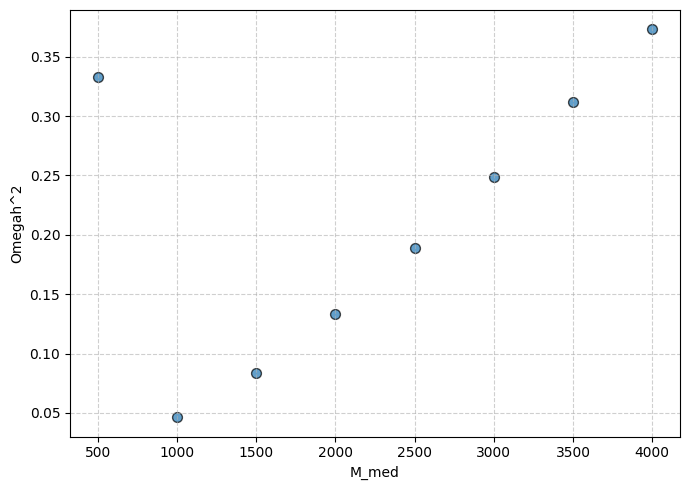

In [17]:
plot_columns(df, 'M_med', "Omegah^2", xlabel='M_med', ylabel="Omegah^2", log=False)

In [18]:
df.to_pickle('/home/mjrxy/resonant-scalar-madg/notebooks/maddm_results.pkl')

In [58]:
workdir_process = f"{workdir_path}/{process_dir}"
with open(workdir_process + '/Events/scan_run_0[1-9].txt', "r") as file:
    lines = file.readlines()

In [60]:
[line.strip(" ") for line in lines]

['#run_name            mass#52              mass#54              cross                error                width#9000002        width#9000003        width#9000004        \n',
 'run_01               5.000000e+02         1.500000e+03         4.788800e-05         2.713600e-07         0.000000e+00         0.000000e+00         0.000000e+00         \n',
 'run_02               5.000000e+02         2.500000e+03         1.111600e-05         5.670700e-08         0.000000e+00         0.000000e+00         0.000000e+00         \n',
 'run_03               5.000000e+02         3.500000e+03         2.019800e-06         1.207600e-08         0.000000e+00         0.000000e+00         0.000000e+00         \n',
 'run_04               8.333333e+02         1.500000e+03         9.327200e-08         7.674700e-10         0.000000e+00         0.000000e+00         0.000000e+00         \n',
 'run_05               8.333333e+02         2.500000e+03         7.603300e-06         3.629500e-08         0.000000e+00      

## Read info from generated files

### Unpack lhe files

In [65]:
import subprocess
import os
import pandas as pd
#import mplhep as hep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lhe_file = '/home/mjrxy/MadPy/workdir/new_process/Events/run_01/unweighted_events.lhe.gz'

def unpack_events(events_path):
    try:
        #output_zip_file = os.path.join(working_dir, f"{event_name}/Events/run_01/unweighted_events.lhe.gz")
        subprocess.run(["gzip", "-d", events_path])
        print("Arquivo LHE descompactado com sucesso.")
    except FileNotFoundError:
        print('Arquivo ja foi descompactado')

unpack_events(lhe_file)

Arquivo LHE descompactado com sucesso.


In [ ]:
import subprocess
import os
import pandas as pd
#import mplhep as hep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

MG_VERSION = "v3_6_2"

import subprocess
import os
import pandas as pd
#import mplhep as hep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lhe_file = '/home/mjrxy/MadPy/workdir/dmsimp_v1/Events/run_01/unweighted_events.lhe.gz'
def unpack_events(events_path):
    # Caminho para o arquivo de saída com eventos gerados
    output_file = events_path # os.path.join(working_dir, f"{event_name}/Events/run_01/unweighted_events.lhe")
    try:
        #output_zip_file = os.path.join(working_dir, f"{event_name}/Events/run_01/unweighted_events.lhe.gz")
        subprocess.run(["gzip", "-d", "-k", output_file])
        print("Arquivo LHE descompactado com sucesso.")
        
        return events_path.strip(".gz")
    except FileNotFoundError:
        print('Arquivo ja foi descompactado')

lhe_file = '/home/mjrxy/MadPy/workdir/dmsimp_v1/Events/run_01/unweighted_events.lhe.gz'
output_lhe_file = unpack_events(lhe_file)


Arquivo LHE descompactado com sucesso.


gzip: /home/mjrxy/MadPy/workdir/dmsimp_v1/Events/run_01/unweighted_events.lhe already exists;	not overwritten


In [101]:
# Extract cross section from LHE file
def get_cross_section(lhe_file):
    cross_section = None
    with open(lhe_file, 'r') as file:
        in_init_block = False
        for line in file:
            if "<init>" in line:
                in_init_block = True
            elif "</init>" in line:
                in_init_block = False
                break
            elif in_init_block:
                data = line.strip().split()
                if len(data) <= 6:
                    cross_section = float(data[0]) 
                    error = float(data[1])
                    break
    return cross_section, error

# Extract the events and convert it to pandas format
def parse_lhe_file(file_path, cross_section, error, run_number=None):
    events = []
    event_id = 0

    with open(file_path, 'r') as file:
        in_event = False
        for line in file:
            if "<event>" in line:
                in_event = True
                event = []
                event_id += 1  # Incrementa o ID do evento a cada novo evento
            elif "</event>" in line:
                in_event = False
                events.append(event)
            elif in_event:
                data = line.strip().split()
                if len(data) >= 6:
                    try:
                        particle_data = list(map(float, data))
                        particle_data.append(event_id)  # Adiciona o ID do evento à partícula
                        event.append(particle_data)
                    except ValueError:
                        #print("line ", line)
                        #print("event id ", event_id)
                        #print('particle data ', particle_data)
                        #print('error in line ', data)
                        pass


                        # TODO: How to extract this info 
                        # <mgrwt>
                        # <rscale>  0 0.43702855E+04</rscale>
                        # <asrwt>0</asrwt>
                        # <pdfrwt beam="1">  1        2 0.25919763E+00 0.43702855E+04</pdfrwt>
                        # <pdfrwt beam="2">  1       -2 0.32749606E+00 0.43702855E+04</pdfrwt>
                        # <totfact> 0.16864895E-01</totfact>
                        # </mgrwt>

            
    # Converte a lista de eventos para um DataFrame
    columns = ["pid", "status", "m_mother1", "mother2", "color1", "color2", "px", "py", "pz", "E", "M", "lifetime", "spin", "event_id"]
    df = pd.DataFrame([item for sublist in events for item in sublist], columns=columns)
    # Adiciona uma coluna de cross-section (mesmo valor para todos os eventos)
    df["cross_section"] = cross_section #pb
    df["cross_section_error"] = error #± pb
    df.dropna(subset=["lifetime", "spin"], inplace=True)
    
    if run_number:
        df['run_number'] = run_number
        

    return df, events

# Extraia a cross-section do arquivo LHE
cross_section_value, cross_section_error = get_cross_section(output_lhe_file)
print(f'Cross section of the run: {cross_section_value} pb +/- {cross_section_error} pb' )


Cross section of the run: 9.71148e-06 pb +/- 3.517785e-08 pb


In [102]:
df_events_merged = pd.DataFrame()
lhe_file = '/home/mjrxy/MadPy/workdir/dmsimp_v1/Events/run_01/unweighted_events.lhe.gz'
output_lhe_file = unpack_events(lhe_file)
for run in [1, 2, 3, 4]:
    lhe_file = f'/home/mjrxy/MadPy/workdir/dmsimp_v1/Events/run_0{run}/unweighted_events.lhe.gz'
    output_lhe_file = unpack_events(lhe_file)
    
    df_events, _ = parse_lhe_file(output_lhe_file, cross_section_value, cross_section_error, run_number=run)
    df_events_merged = pd.concat([df_events_merged, df_events])


gzip: /home/mjrxy/MadPy/workdir/dmsimp_v1/Events/run_01/unweighted_events.lhe already exists;	not overwritten
gzip: /home/mjrxy/MadPy/workdir/dmsimp_v1/Events/run_01/unweighted_events.lhe already exists;	not overwritten
gzip: /home/mjrxy/MadPy/workdir/dmsimp_v1/Events/run_02/unweighted_events.lhe.gz: No such file or directory
gzip: /home/mjrxy/MadPy/workdir/dmsimp_v1/Events/run_03/unweighted_events.lhe already exists;	not overwritten


Arquivo LHE descompactado com sucesso.
Arquivo LHE descompactado com sucesso.
Arquivo LHE descompactado com sucesso.
Arquivo LHE descompactado com sucesso.
Arquivo LHE descompactado com sucesso.


gzip: /home/mjrxy/MadPy/workdir/dmsimp_v1/Events/run_04/unweighted_events.lhe already exists;	not overwritten


In [103]:
df_events_merged

,pid,status,m_mother1,mother2,color1,color2,px,py,pz,E,M,lifetime,spin,event_id,cross_section,cross_section_error,run_number
1,2.0,-1.0,0.0,0.0,501.0,0.0,0.000000,0.000000,1943.982226,1943.982226,0.0000,0.0,1.0,1.0,0.00001,3.517785e-08,1
2,-2.0,-1.0,0.0,0.0,0.0,501.0,-0.000000,-0.000000,-2456.220443,2456.220443,0.0000,0.0,-1.0,1.0,0.00001,3.517785e-08,1
3,54.0,2.0,1.0,2.0,0.0,0.0,612.476625,-894.719000,-34.397685,3215.305509,3026.7733,0.0,0.0,1.0,0.00001,3.517785e-08,1
4,52.0,1.0,3.0,3.0,0.0,0.0,1054.075517,638.417402,556.966260,1441.826408,500.0000,0.0,1.0,1.0,0.00001,3.517785e-08,1
5,-52.0,1.0,3.0,3.0,0.0,0.0,-441.598892,-1533.136402,-591.363945,1773.479101,500.0000,0.0,1.0,1.0,0.00001,3.517785e-08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6511,-2.0,-1.0,0.0,0.0,0.0,501.0,-0.000000,0.000000,2201.177140,2201.177140,0.0000,0.0,-1.0,1000.0,0.00001,3.517785e-08,4
6512,2.0,-1.0,0.0,0.0,501.0,0.0,0.000000,-0.000000,-3408.418752,3408.418752,0.0000,0.0,1.0,1000.0,0.00001,3.517785e-08,4
6513,52.0,1.0,1.0,2.0,0.0,0.0,146.051217,-1244.666732,-1615.490473,2535.810659,1500.0000,0.0,1.0,1000.0,0.00001,3.517785e-08,4
6514,-52.0,1.0,1.0,2.0,0.0,0.0,-901.409811,1194.358992,-163.605877,2125.041160,1500.0000,0.0,1.0,1000.0,0.00001,3.517785e-08,4


### Subtitles for the PIDs

In [ ]:
import pandas as pd


## TODO: Refactor this table with DM particles


# Criação da tabela de referência de partículas
particle_data = {
    "PID": [11, -11, 13, -13, 22, 12, -12, 14, -14, 16, -16, 1, -1, 2, -2, 3, -3, 4, -4, 5, -5, 21, 23, 24, -24],
    "Name": [
        "Electron", "Positron", "Muon", "Anti-Muon", "Photon",
        "Electron Neutrino", "Electron Anti-Neutrino", "Muon Neutrino", "Muon Anti-Neutrino",
        "Tau Neutrino", "Tau Anti-Neutrino", "Down Quark", "Anti-Down Quark",
        "Up Quark", "Anti-Up Quark", "Strange Quark", "Anti-Strange Quark",
        "Charm Quark", "Anti-Charm Quark", "Bottom Quark", "Anti-Bottom Quark",
        "Gluon", "Z Boson", "W+ Boson", "W- Boson"
    ],
    "Symbol": [
        "e-", "e+", "mu-", "mu+", "a",
        "ve", "ve~", "vm", "vm~",
        "vt", "vt~", "d", "d~",
        "u", "u~", "s", "s~",
        "c", "c~", "b", "b~",
        "g", "z", "w+", "w-"
    ]
}

# Criação do DataFrame com as informações de partículas
particle_df = pd.DataFrame(particle_data)
particle_df.to_csv('particle_names.csv', index=False)
print(particle_df)

In [104]:
total_cross_section = df_events.cross_section.iloc[0] * 1000 # converts to fb
total_cross_section_error = df_events.cross_section_error.iloc[0]
print(total_cross_section, total_cross_section_error)

0.00971148 3.517785e-08
